In [11]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn as sk
from scipy import stats
from statsmodels.tsa.stattools import adfuller

In [21]:
# FUNCTIONS

# Get every contract month over the years
def month_overlay(df, month):

    month_df = pd.DataFrame()

    for i in df.columns:

        if month == i[2]:

            month_df[i] = df[i]

    return month_df

def plotting_pdf_overlay(df, window, closed = True):
    """
    Function plots pdf of all log returns from a specified window (in days) from the closing price
    """

    fig, ax = plt.subplots(figsize = (12, 7))

    closed_contracts = []

    if closed == True:

        for i in df.columns:
            
            # Checking if the last value in matrix is null and appending if so -> implies contract has closed
            if pd.isna(df[i].iloc[-1]):
                closed_contracts.append(i)
            
        truncated_df = df[closed_contracts]
    
    else:
        truncated_df = df

    colors = plt.cm.viridis(np.linspace(0, 1, len(truncated_df.columns)))

    for idx, contract in enumerate(truncated_df.columns):

        # Getting all non-null returns for the contract
        returns = truncated_df[contract].dropna()

        # Skip contracts that dont have enough observations for the window
        if len (returns) < window:
            continue

        else:
            truncated_returns = returns.tail(window)

        kde = stats.gaussian_kde(truncated_returns)
        x_range = np.linspace(truncated_returns.min() - 3 * truncated_returns.std(), truncated_returns.max() + 3 * truncated_returns.std(), 500)

        year = contract.split()[0][-2:]
        
        ax.plot(x_range, kde(x_range), label=f"'{year}", color = colors[idx], linewidth = 2.5, alpha = 0.75)

    ax.set_xlabel('Log Returns', fontsize = 12, fontweight = 'bold')
    ax.set_ylabel('Density', fontsize = 12, fontweight = 'bold')
    ax.set_title(f'Return Distributions - {contract_letters_dict[df.columns[0][2]]}MM Last {window} Days Before Expiry (Closed Contracts)', fontsize = 12, fontweight = 'bold')
    ax.legend(loc = 'best', fontsize = 9, ncol = 3)
    ax.grid(True, alpha = 0.3, linestyle = '--')
    plt.tight_layout()
    
    return fig, ax

In [3]:
ng_futures_prices_df = pd.read_excel('raw_data/natgasfutures_prices.xlsx', index_col = 0, parse_dates = [0])

# Dropping all weekends where there is no pricing data (may cause issues in future)
ng_futures_prices_df.dropna(how = 'all', inplace = True)
ng_futures_prices_df

,NGF15 Comdty,NGG15 Comdty,NGH15 Comdty,NGJ15 Comdty,NGK15 Comdty,NGM15 Comdty,NGN15 Comdty,NGQ15 Comdty,NGU15 Comdty,NGV15 Comdty,...,NGH32 Comdty,NGJ32 Comdty,NGK32 Comdty,NGM32 Comdty,NGN32 Comdty,NGQ32 Comdty,NGU32 Comdty,NGV32 Comdty,NGX32 Comdty,NGZ32 Comdty
2014-12-01,4.007,4.009,3.953,3.648,3.619,3.642,3.669,3.676,3.658,3.686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,3.874,3.877,3.831,3.568,3.548,3.574,3.605,3.613,3.597,3.623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-03,3.805,3.808,3.761,3.514,3.501,3.531,3.562,3.571,3.555,3.580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-04,3.649,3.661,3.613,3.419,3.411,3.440,3.474,3.483,3.469,3.496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-05,3.802,3.823,3.774,3.528,3.518,3.545,3.575,3.583,3.567,3.594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.493,3.021,3.007,3.146,3.300,3.350,3.330,3.394,3.585,4.000
2026-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.521,3.049,3.035,3.174,3.328,3.378,3.358,3.422,3.613,4.014
2026-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.557,3.085,3.071,3.210,3.364,3.414,3.394,3.458,3.649,4.050
2026-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.461,2.989,2.975,3.114,3.268,3.318,3.298,3.362,3.553,3.983


In [4]:
# List of all contracts
contract_list = []

for i in ng_futures_prices_df.columns:

    contract_list.append(i)

# Create dictionary with contract letters as keys and months as values (ie 'F': '01')
contract_letters_dict = {}

letter_list = []
for i in contract_list:
    if i[3:5] == '15':
        letter_list.append(i[2])

count = 1

while count <= 12:

    if count < 10:
        contract_letters_dict[letter_list[count - 1]] = '0' + str(count)
    
    else:
        contract_letters_dict[letter_list[count - 1]] = str(count)
    count += 1

In [5]:
# Get log returns for all the contracts
ng_log_returns_df = pd.DataFrame()

for i in contract_list:
    ng_log_returns_df[i] = np.log(ng_futures_prices_df[i] / ng_futures_prices_df[i].shift(1))

ng_log_returns_df.dropna(how = 'all', inplace = True)
ng_log_returns_df

C:\Users\limb.ch\AppData\Local\Temp\ipykernel_10232\1554169680.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ng_log_returns_df[i] = np.log(ng_futures_prices_df[i] / ng_futures_prices_df[i].shift(1))


,NGF15 Comdty,NGG15 Comdty,NGH15 Comdty,NGJ15 Comdty,NGK15 Comdty,NGM15 Comdty,NGN15 Comdty,NGQ15 Comdty,NGU15 Comdty,NGV15 Comdty,...,NGH32 Comdty,NGJ32 Comdty,NGK32 Comdty,NGM32 Comdty,NGN32 Comdty,NGQ32 Comdty,NGU32 Comdty,NGV32 Comdty,NGX32 Comdty,NGZ32 Comdty
2014-12-02,-0.033755,-0.033480,-0.031349,-0.022174,-0.019814,-0.018848,-0.017597,-0.017287,-0.016816,-0.017239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-03,-0.017972,-0.017958,-0.018441,-0.015250,-0.013335,-0.012104,-0.012000,-0.011693,-0.011745,-0.011940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-04,-0.041863,-0.039368,-0.040146,-0.027407,-0.026043,-0.026110,-0.025016,-0.024952,-0.024489,-0.023743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-05,0.041074,0.043299,0.043597,0.031383,0.030887,0.030067,0.028659,0.028306,0.027859,0.027646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-08,-0.055983,-0.053733,-0.053052,-0.036662,-0.034706,-0.032978,-0.031541,-0.031182,-0.031035,-0.030511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.011669,-0.013480,-0.013543,-0.012948,-0.012348,-0.012165,-0.012237,-0.012008,-0.011372,-0.010198
2026-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007984,0.009226,0.009269,0.008861,0.008449,0.008323,0.008373,0.008216,0.007780,0.003494
2026-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.010172,0.011738,0.011792,0.011278,0.010759,0.010601,0.010664,0.010465,0.009915,0.008929
2026-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027360,-0.031613,-0.031759,-0.030363,-0.028953,-0.028522,-0.028693,-0.028154,-0.026661,-0.016682


In [7]:
# Month flat price df
jan_df = month_overlay(ng_futures_prices_df, 'F')
feb_df = month_overlay(ng_futures_prices_df, 'G')
march_df = month_overlay(ng_futures_prices_df, 'H')
april_df = month_overlay(ng_futures_prices_df, 'J')
may_df = month_overlay(ng_futures_prices_df, 'K')
june_df = month_overlay(ng_futures_prices_df, 'M')
july_df = month_overlay(ng_futures_prices_df, 'N')
august_df = month_overlay(ng_futures_prices_df, 'Q')
september_df = month_overlay(ng_futures_prices_df, 'U')
october_df = month_overlay(ng_futures_prices_df, 'V')
november_df = month_overlay(ng_futures_prices_df, 'X')
december_df = month_overlay(ng_futures_prices_df, 'Z')

# Month log returns df
jan_log_df = month_overlay(ng_log_returns_df, 'F')
feb_log_df = month_overlay(ng_log_returns_df, 'G')
march_log_df = month_overlay(ng_log_returns_df, 'H')
april_log_df = month_overlay(ng_log_returns_df, 'J')
may_log_df = month_overlay(ng_log_returns_df, 'K')
june_log_df = month_overlay(ng_log_returns_df, 'M')
july_log_df = month_overlay(ng_log_returns_df, 'N')
august_log_df = month_overlay(ng_log_returns_df, 'Q')
september_log_df = month_overlay(ng_log_returns_df, 'U')
october_log_df = month_overlay(ng_log_returns_df, 'V')
november_log_df = month_overlay(ng_log_returns_df, 'X')
december_log_df = month_overlay(ng_log_returns_df, 'Z')

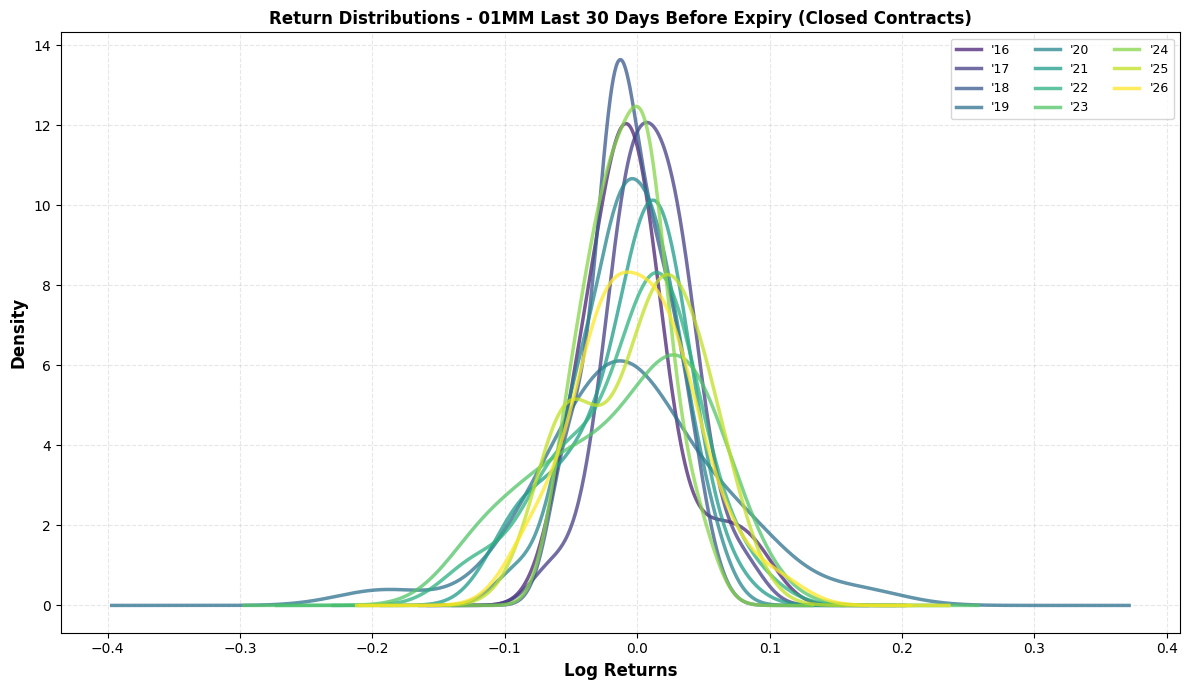

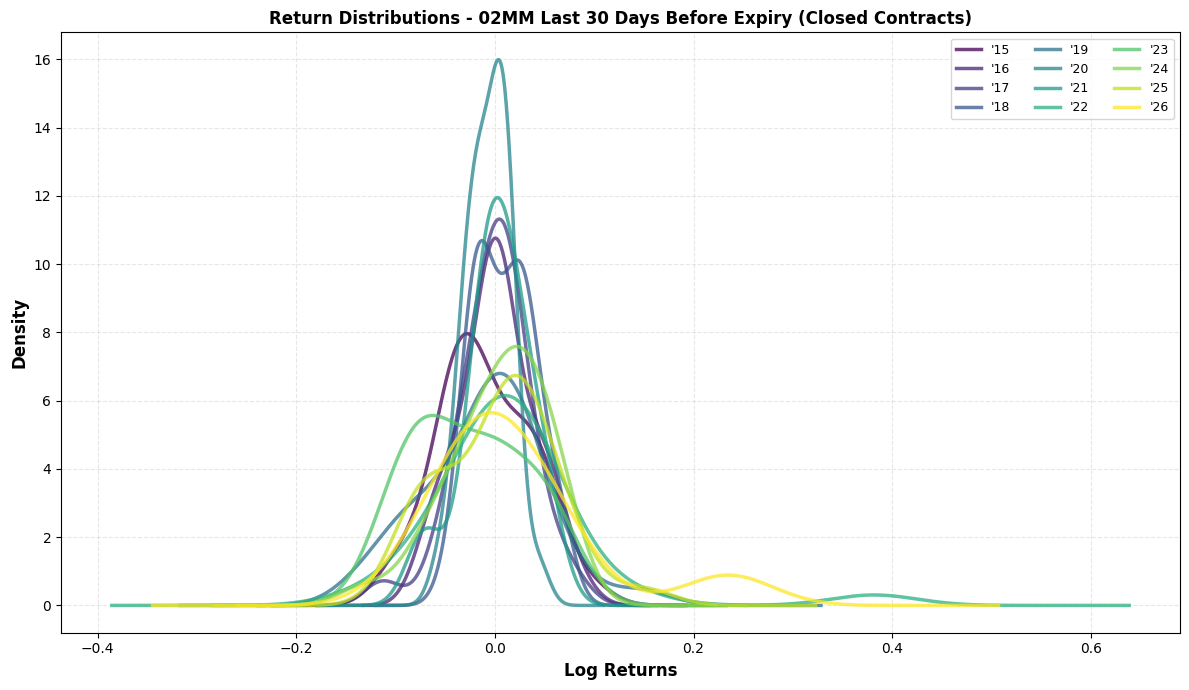

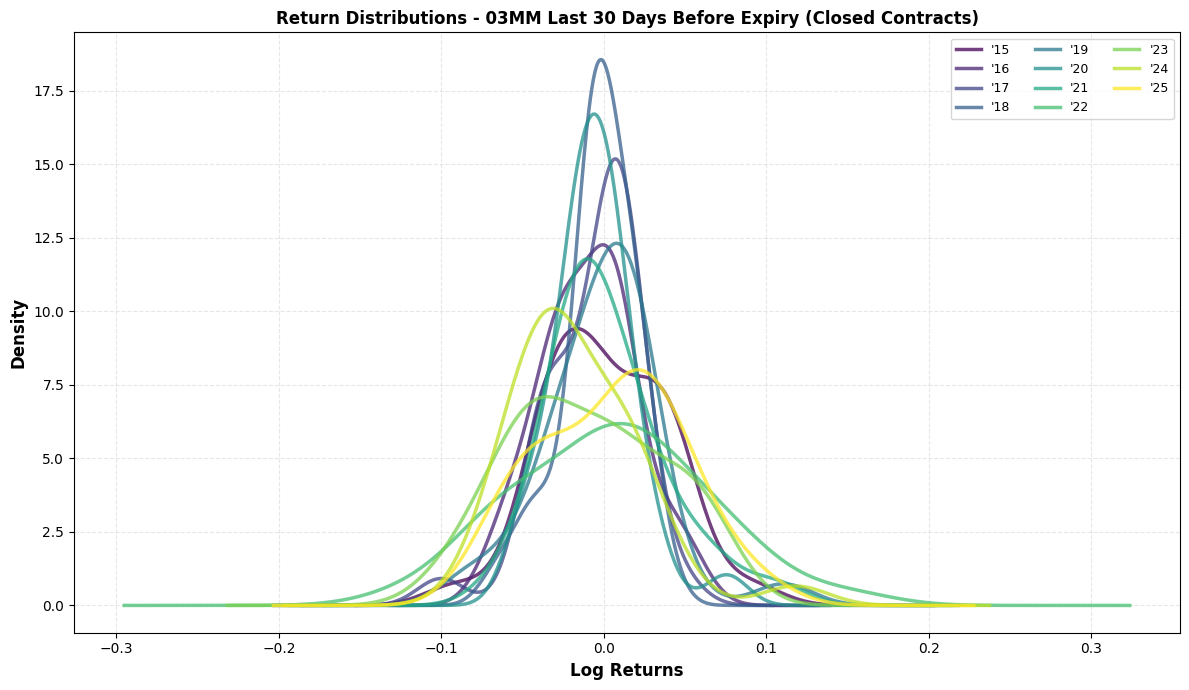

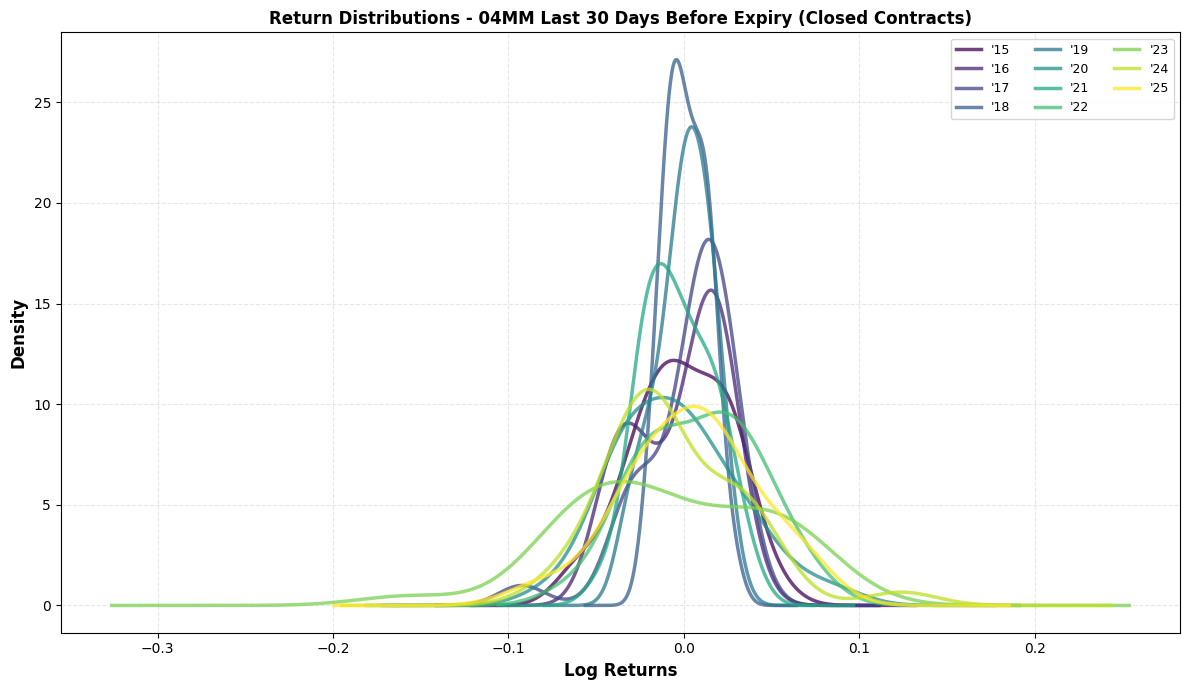

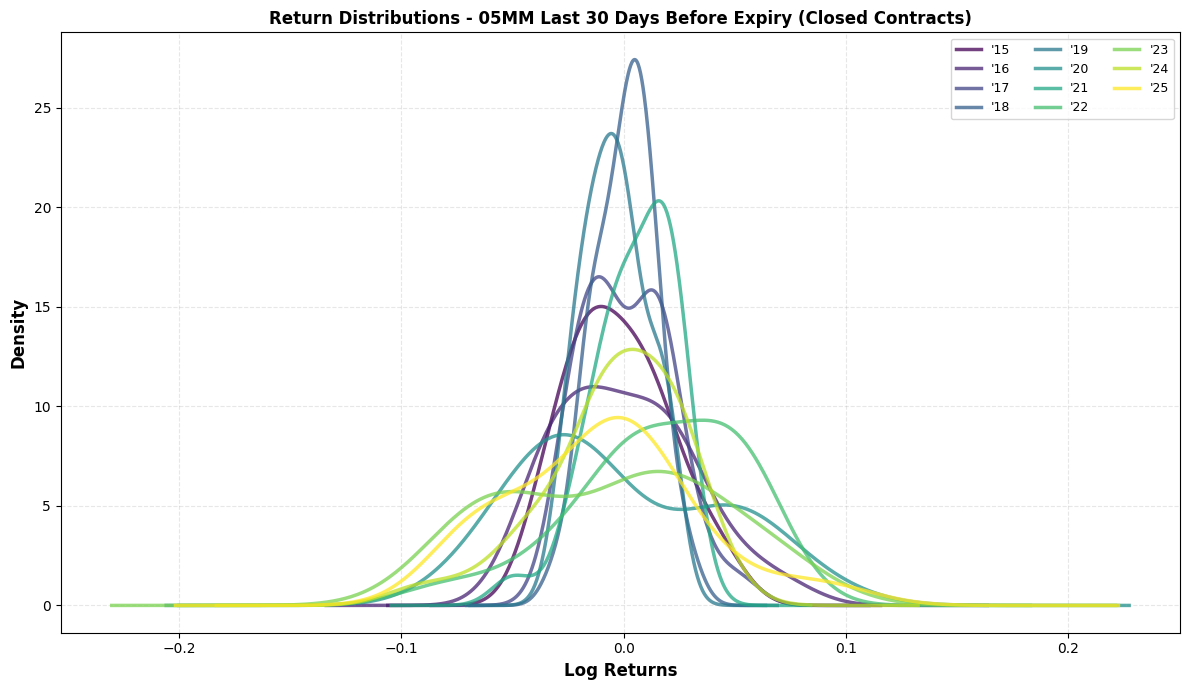

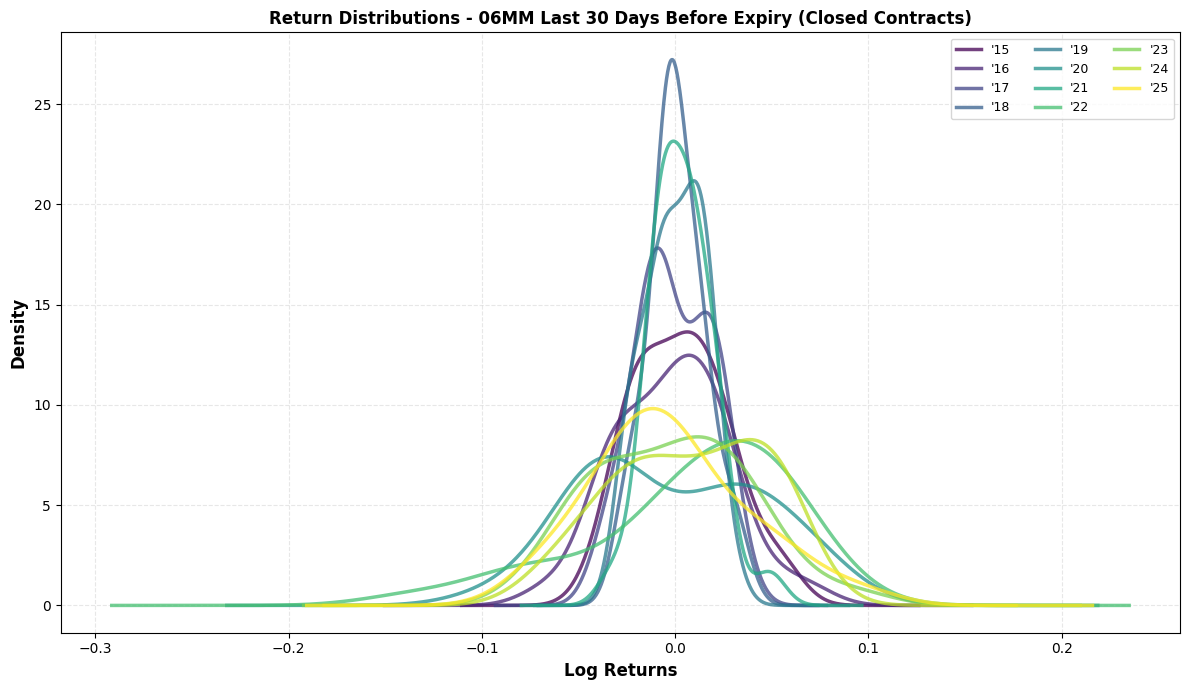

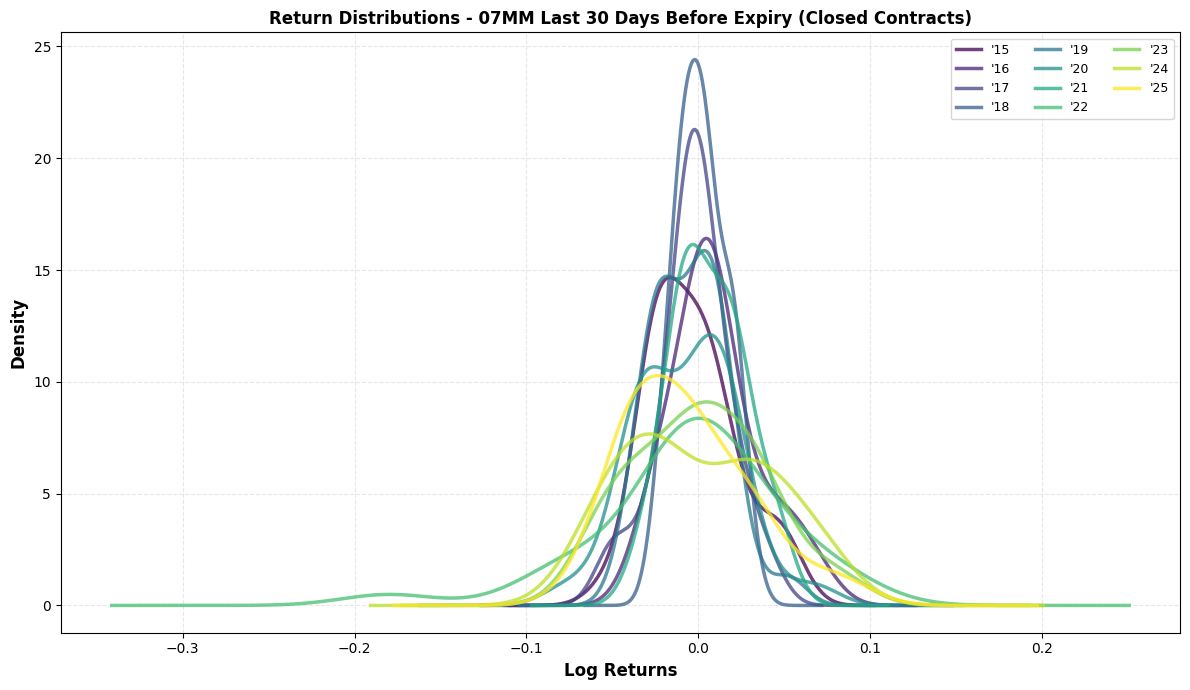

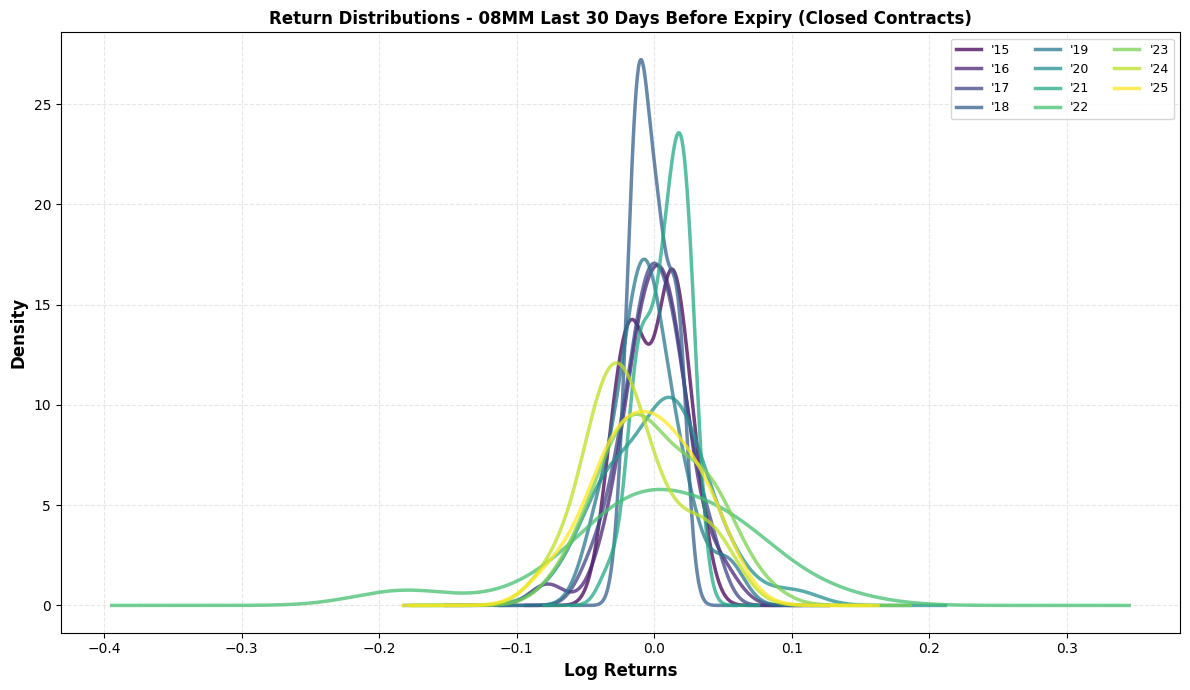

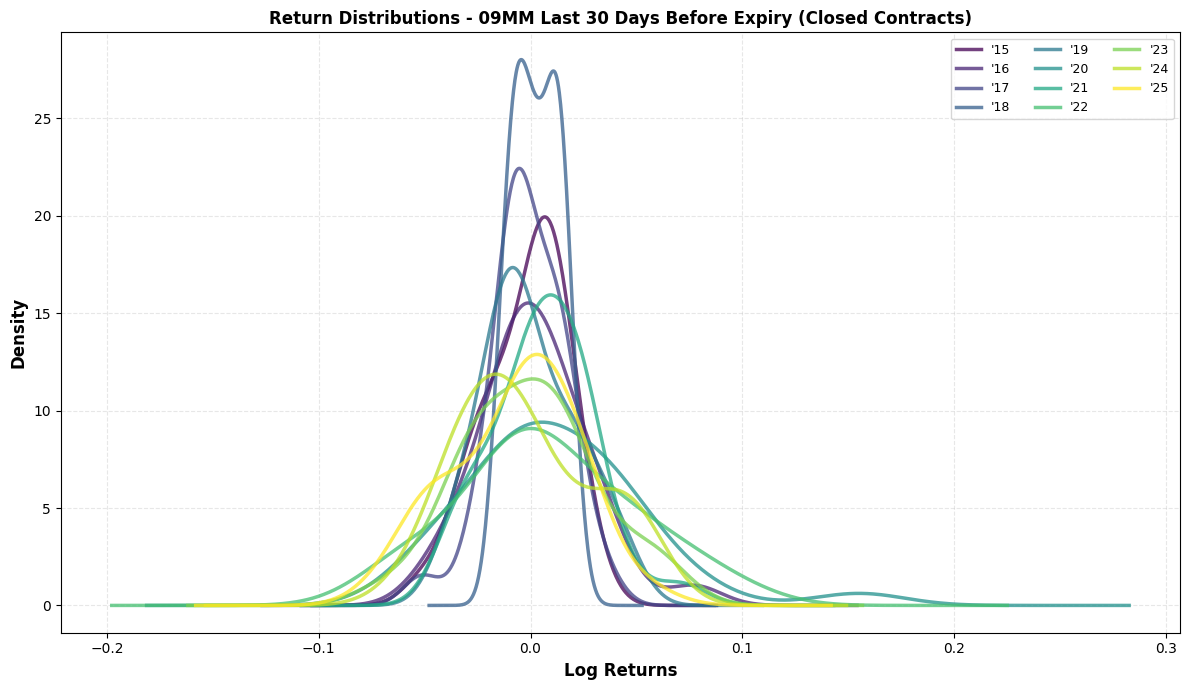

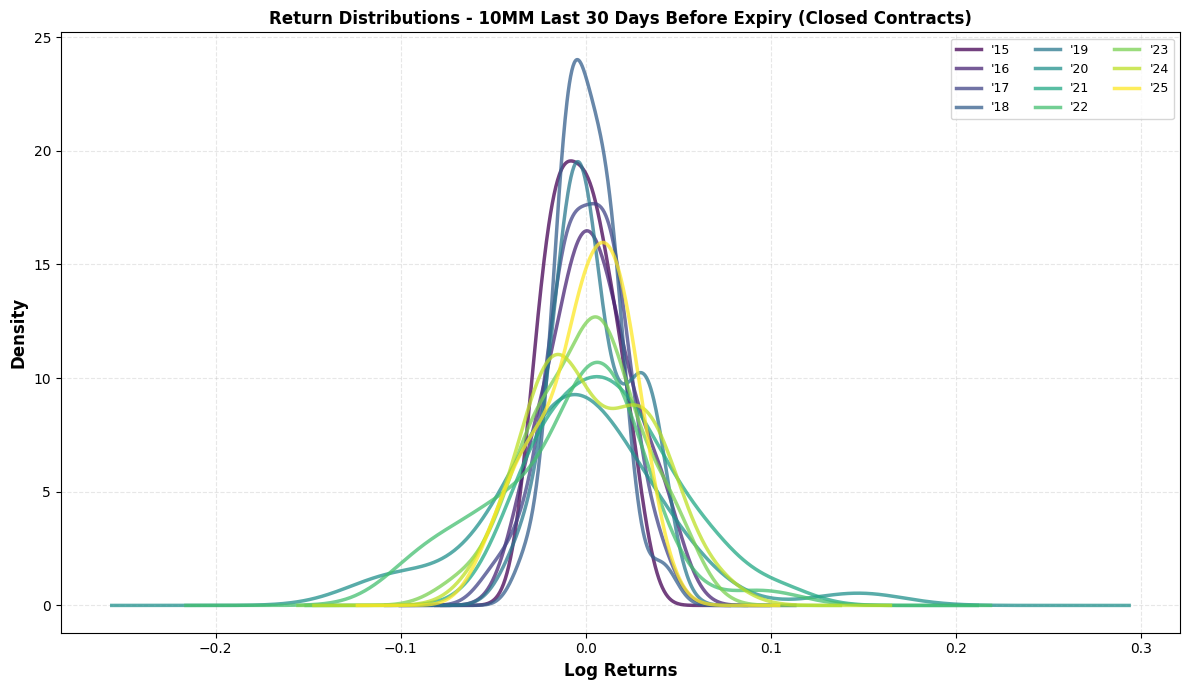

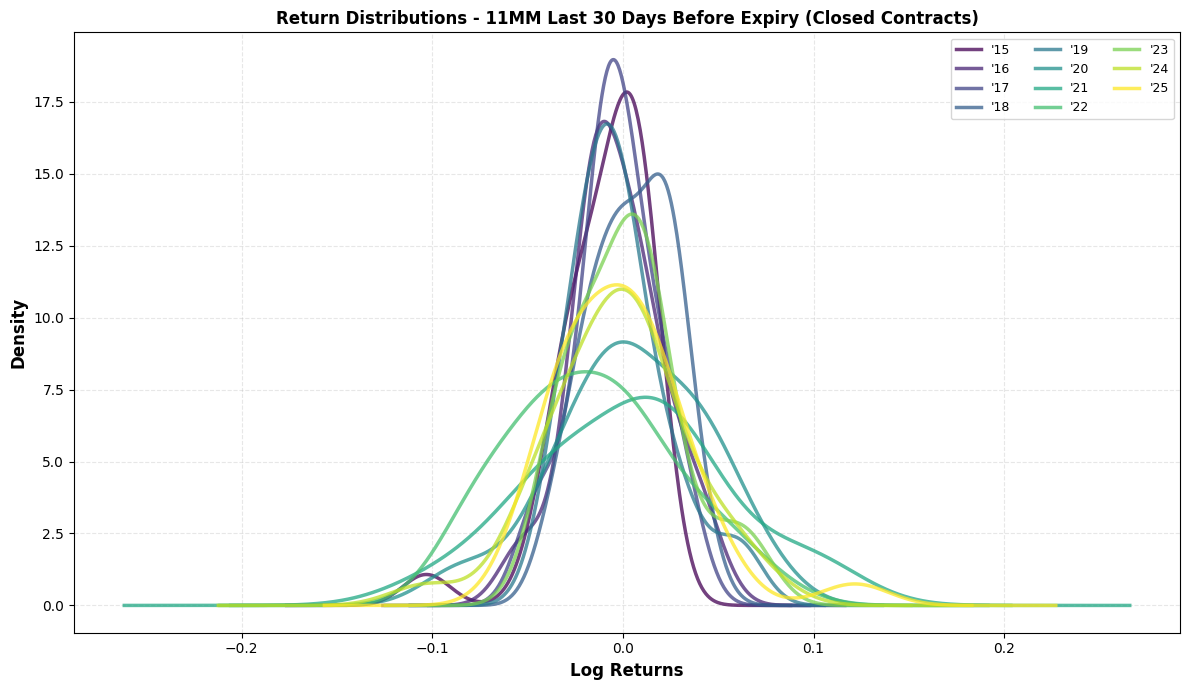

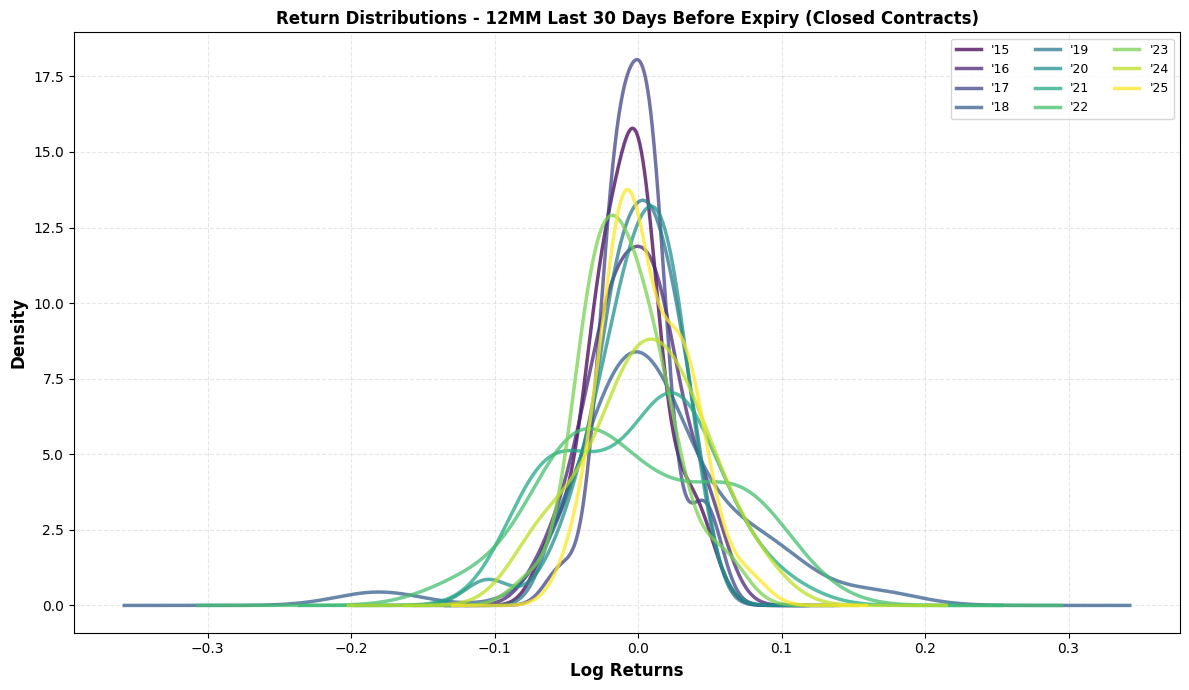

In [22]:
log_df_list = [jan_log_df, feb_log_df, march_log_df, april_log_df, may_log_df, june_log_df, july_log_df, august_log_df, september_log_df, october_log_df, november_log_df, december_log_df]

for i in log_df_list:
    fig, ax = plotting_pdf_overlay(i, 30)
    plt.show()

In [ ]:
def create_spread_df(df, long_month, short_month, start_year = 17):

    spread_name = str(long_month + " - " + short_month)
    spread_df = pd.DataFrame()

    place_holder = 0
    count = start_year

    for i in df.columns():

        if place_holder == 0:

            if  


            place_holder =+ 1


        if place_holder == 1:


            place_holder =- 1


    spread_df[spread_name] = df[long_month] - df[short_month]
    spread_df.dropna(inplace = True)

    return spread_df

In [29]:
march_april_df = create_spread_df(ng_futures_prices_df, "NGH23 Comdty", "NGJ23 Comdty")
march_april_df.dropna(inplace = True)
march_april_df

,NGH23 Comdty - NGJ23 Comdty
2014-12-01,0.350
2014-12-02,0.350
2014-12-03,0.340
2014-12-04,0.340
2014-12-05,0.340
...,...
2023-02-17,-0.077
2023-02-21,-0.104
2023-02-22,-0.124
2023-02-23,-0.118


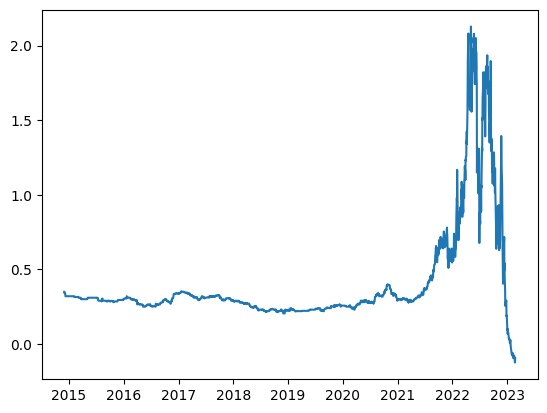

In [30]:
plt.plot(march_april_df)
plt.show()

In [ ]:
def plotting_pdf_overlay(df, window, closed = True):
    """
    Function plots pdf of all log returns from a specified window (in days) from the closing price
    """

    fig, ax = plt.subplots(figsize = (12, 7))

    closed_contracts = []

    if closed == True:

        for i in df.columns:
            
            # Checking if the last value in matrix is null and appending if so -> implies contract has closed
            if pd.isna(df[i].iloc[-1]):
                closed_contracts.append(i)
            
        truncated_df = df[closed_contracts]
    
    else:
        truncated_df = df

    colors = plt.cm.viridis(np.linspace(0, 1, len(truncated_df.columns)))

    for idx, contract in enumerate(truncated_df.columns):

        # Getting all non-null returns for the contract
        returns = truncated_df[contract].dropna()

        # Skip contracts that dont have enough observations for the window
        if len (returns) < window:
            continue

        else:
            truncated_returns = returns.tail(window)

        kde = stats.gaussian_kde(truncated_returns)
        x_range = np.linspace(truncated_returns.min() - 3 * truncated_returns.std(), truncated_returns.max() + 3 * truncated_returns.std(), 500)

        year = contract.split()[0][-2:]
        
        ax.plot(x_range, kde(x_range), label=f"'{year}", color = colors[idx], linewidth = 2.5, alpha = 0.75)

    ax.set_xlabel('Log Returns', fontsize = 12, fontweight = 'bold')
    ax.set_ylabel('Density', fontsize = 12, fontweight = 'bold')
    ax.set_title(f'Return Distributions - {contract_letters_dict[df.columns[0][2]]}MM Last {window} Days Before Expiry (Closed Contracts)', fontsize = 12, fontweight = 'bold')
    ax.legend(loc = 'best', fontsize = 9, ncol = 3)
    ax.grid(True, alpha = 0.3, linestyle = '--')
    plt.tight_layout()
    
    return fig, ax